    .gitignore 

- do not include thats file which is written inside gitignore

##### ✅ Examples:

    .gitignore Entry	What it Ignores
- *.ipynb --------------> All Jupyter Notebook files
- my_notebook.ipynb	--------------> Just one specific notebook file 
- notebooks/	-------------->Whole folder named notebooks

### Steps to create
    CONDA CREATE
    |
    README FILE CREATE
    |
    create "requirements.txt" 
    |
    create folder for Project Package
    |       |
    |       components,constant,entity,exception,logging,pipeline,utils
    |
    Dockerfile
    |
    setup.py
    


### }- Why create __init__.py inside the folder 
    ans-> to make that folder as a package

### 2). -e.

this is refer to "setup.py" python file 


In [18]:
import pandas as pd
import numpy as np

import seaborn as sns


In [26]:

# To read a CSV file, use pd.read_csv instead:
df = pd.read_csv('Phishing_Legitimate_full.csv').reset_index(drop=True)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))  # Adjust size as needed
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.show()

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
print(df.columns.tolist())


['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname', 'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch', 'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT', 'CLASS_LABEL']


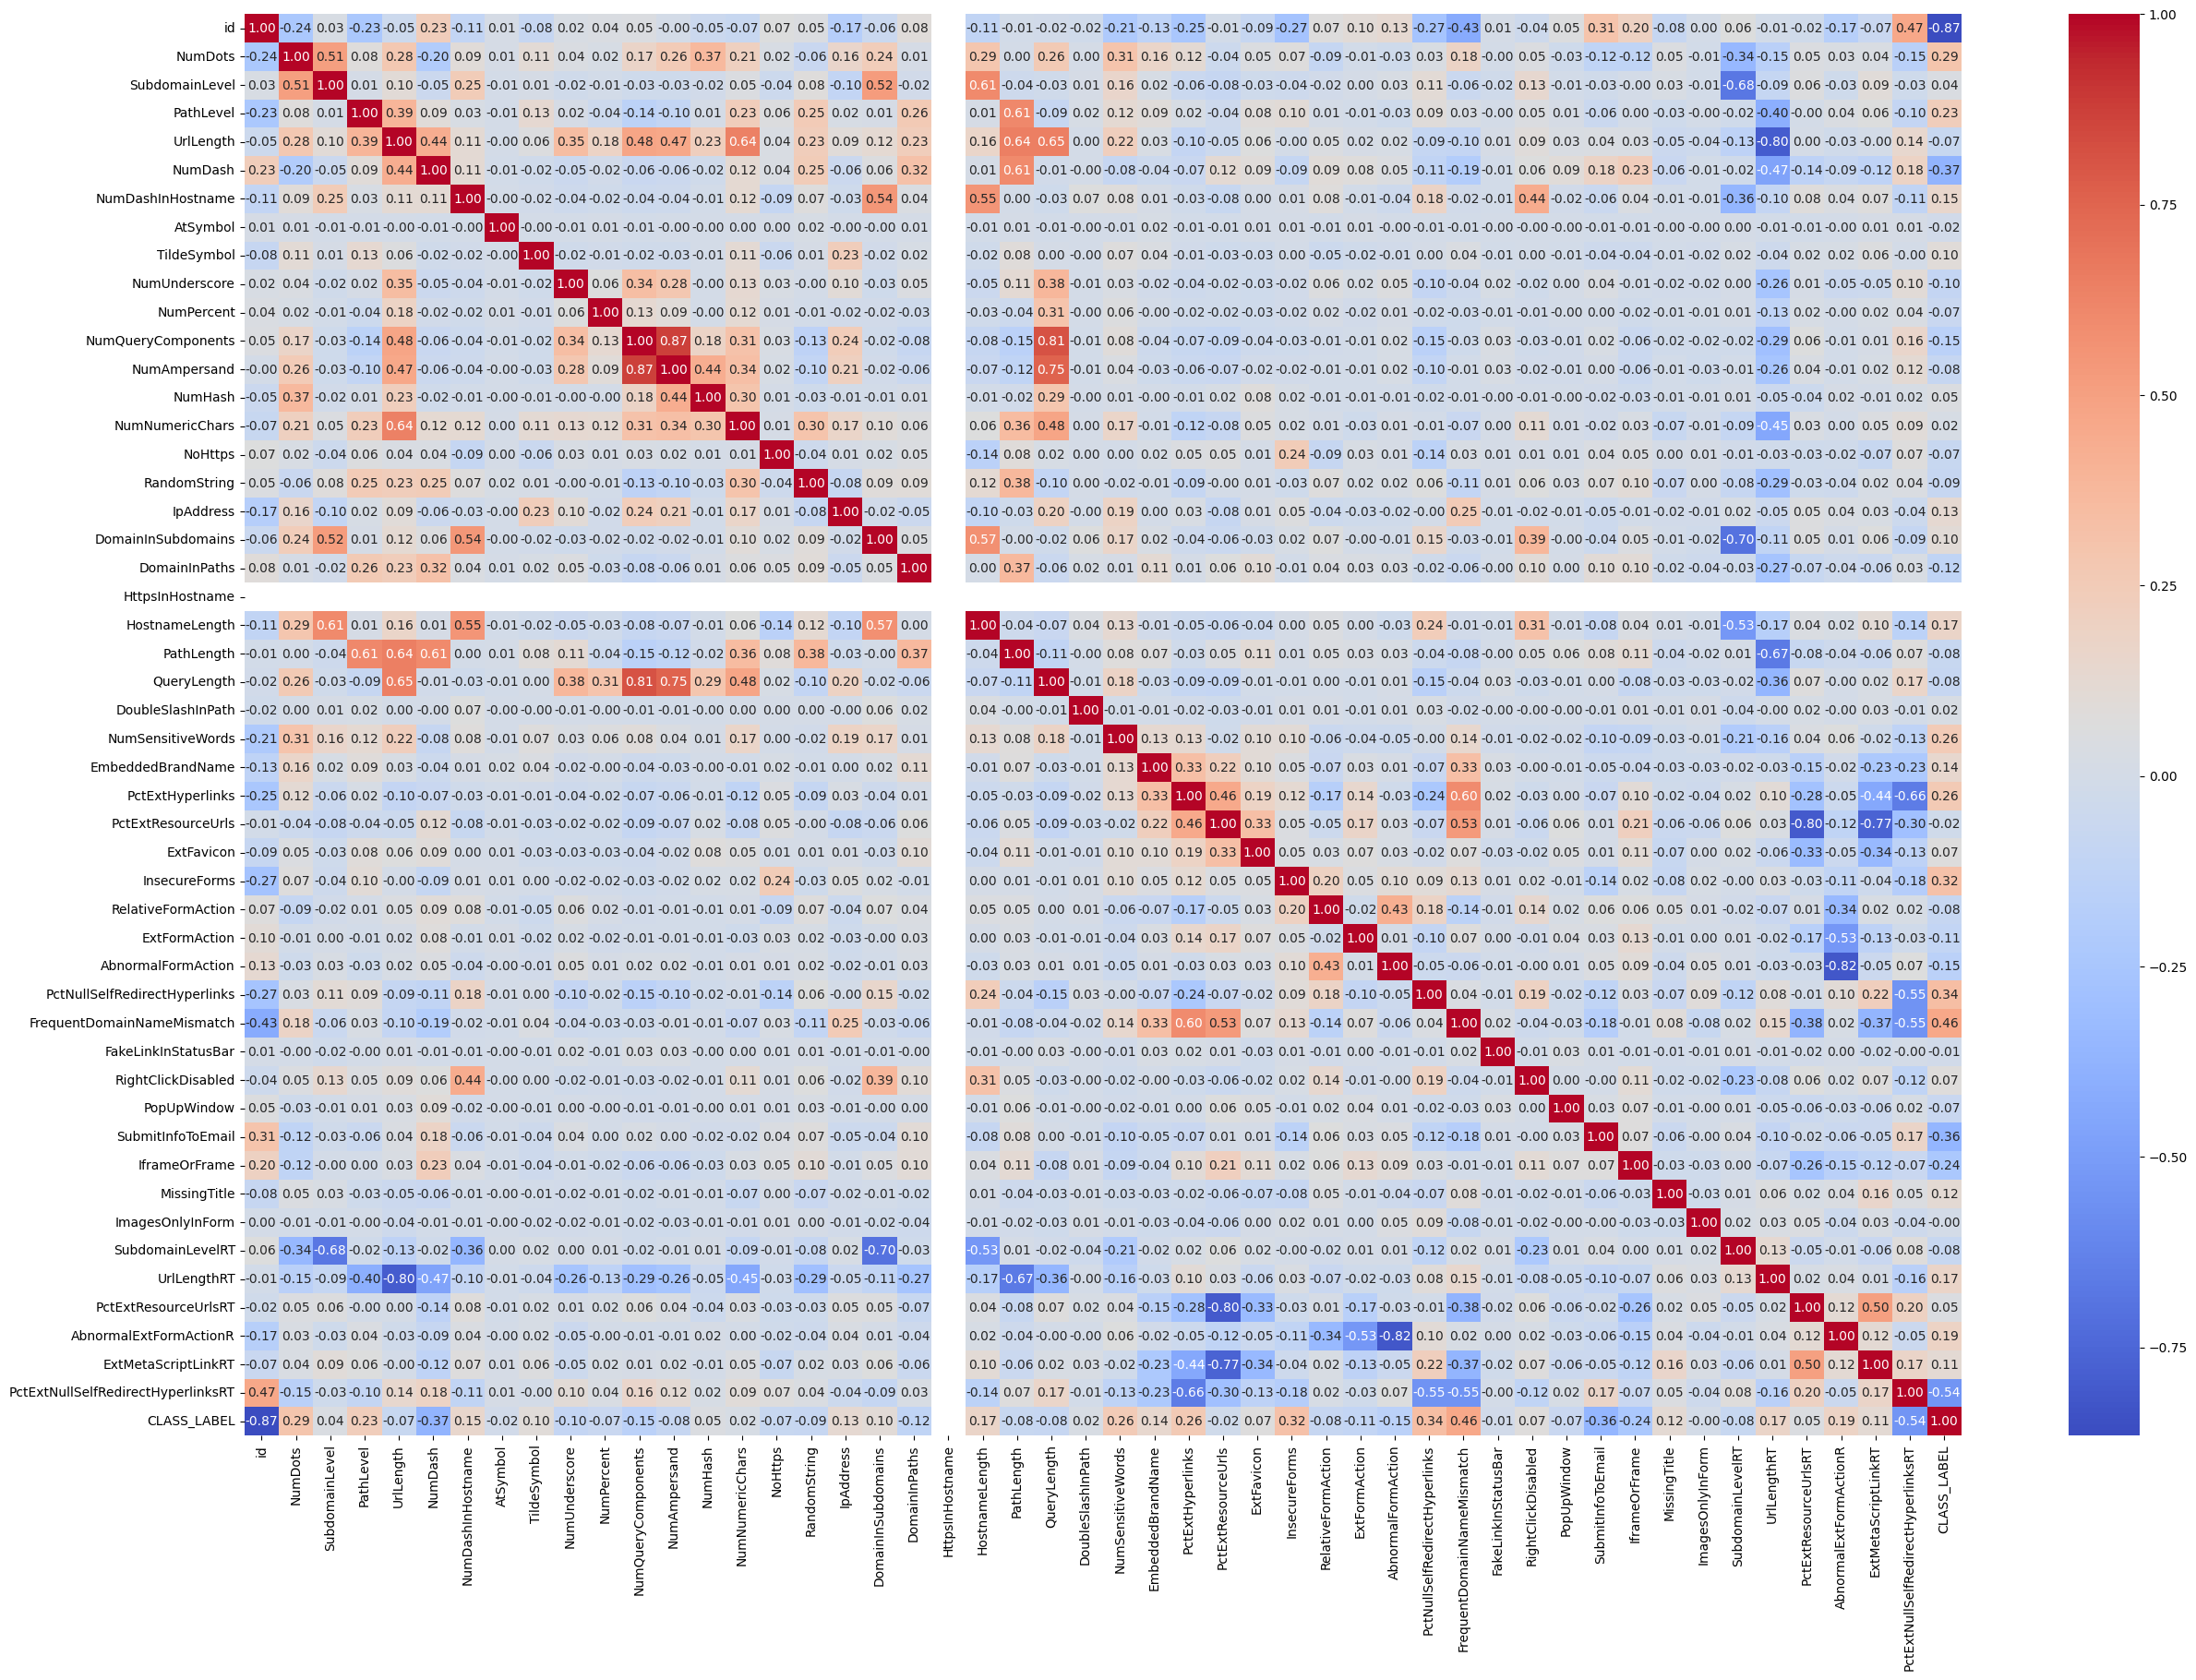

In [28]:
plt.figure(figsize=(30, 20))  # Increase the figure size for better visibility
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.show()


In [22]:
from sklearn.feature_selection import SelectKBest, f_classif
X = df.drop(columns=['CLASS_LABEL'])
y = df['CLASS_LABEL']

# Example usage (assuming `X` is features and `y` is CLASS_LABEL)
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
scores = selector.scores_


c:\Users\offrk\Desktop\Git\NetworkSecurity-Project\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [20] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\offrk\Desktop\Git\NetworkSecurity-Project\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [13]:
# View feature importance with feature names
feature_scores = pd.DataFrame({'Feature': X.columns, 'F_Score': selector.scores_})
feature_scores.sort_values(by='F_Score', ascending=False, inplace=True)
print(feature_scores)


                               Feature       F_Score
0                                   id  29994.001200
48  PctExtNullSelfRedirectHyperlinksRT   4127.232733
35          FrequentDomainNameMismatch   2742.448014
5                              NumDash   1608.132123
39                   SubmitInfoToEmail   1466.317863
34       PctNullSelfRedirectHyperlinks   1331.384975
30                       InsecureForms   1112.073987
1                              NumDots    946.736097
27                    PctExtHyperlinks    723.239761
25                   NumSensitiveWords    696.548355
40                       IframeOrFrame    585.639947
3                            PathLevel    555.621595
46              AbnormalExtFormActionR    357.484550
44                         UrlLengthRT    295.789232
21                      HostnameLength    294.510457
6                    NumDashInHostname    231.530069
11                  NumQueryComponents    222.019905
33                  AbnormalFormAction    214.

In [32]:
print(df.columns.tolist())


['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname', 'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch', 'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT', 'CLASS_LABEL']


In [31]:
df.drop('id', axis=1, inplace=True)


In [34]:
# Safe drop: only drop columns that are present
columns_to_drop = [
    'UrlLengthRT',
    'PctNullSelfRedirectHyperlinksRT',
    'PctExtResourceUrlsRT',
    'RelativeFormAction',
    'AbnormalExtFormActionR',
    'AtSymbol',
    'FakeLinkInStatusBar',
    'ImagesOnlyInForm'
]

# Filter to drop only existing columns
existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop them
df.drop(columns=existing_cols_to_drop, axis=1, inplace=True)


In [35]:
df.columns

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'TildeSymbol', 'NumUnderscore', 'NumPercent',
       'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars',
       'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains',
       'DomainInPaths', 'HttpsInHostname', 'HostnameLength', 'PathLength',
       'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords',
       'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls',
       'ExtFavicon', 'InsecureForms', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail',
       'IframeOrFrame', 'MissingTitle', 'SubdomainLevelRT',
       'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT',
       'CLASS_LABEL'],
      dtype='object')

In [36]:
df.to_csv('Phishing_Legitimate_full.csv', index=False)


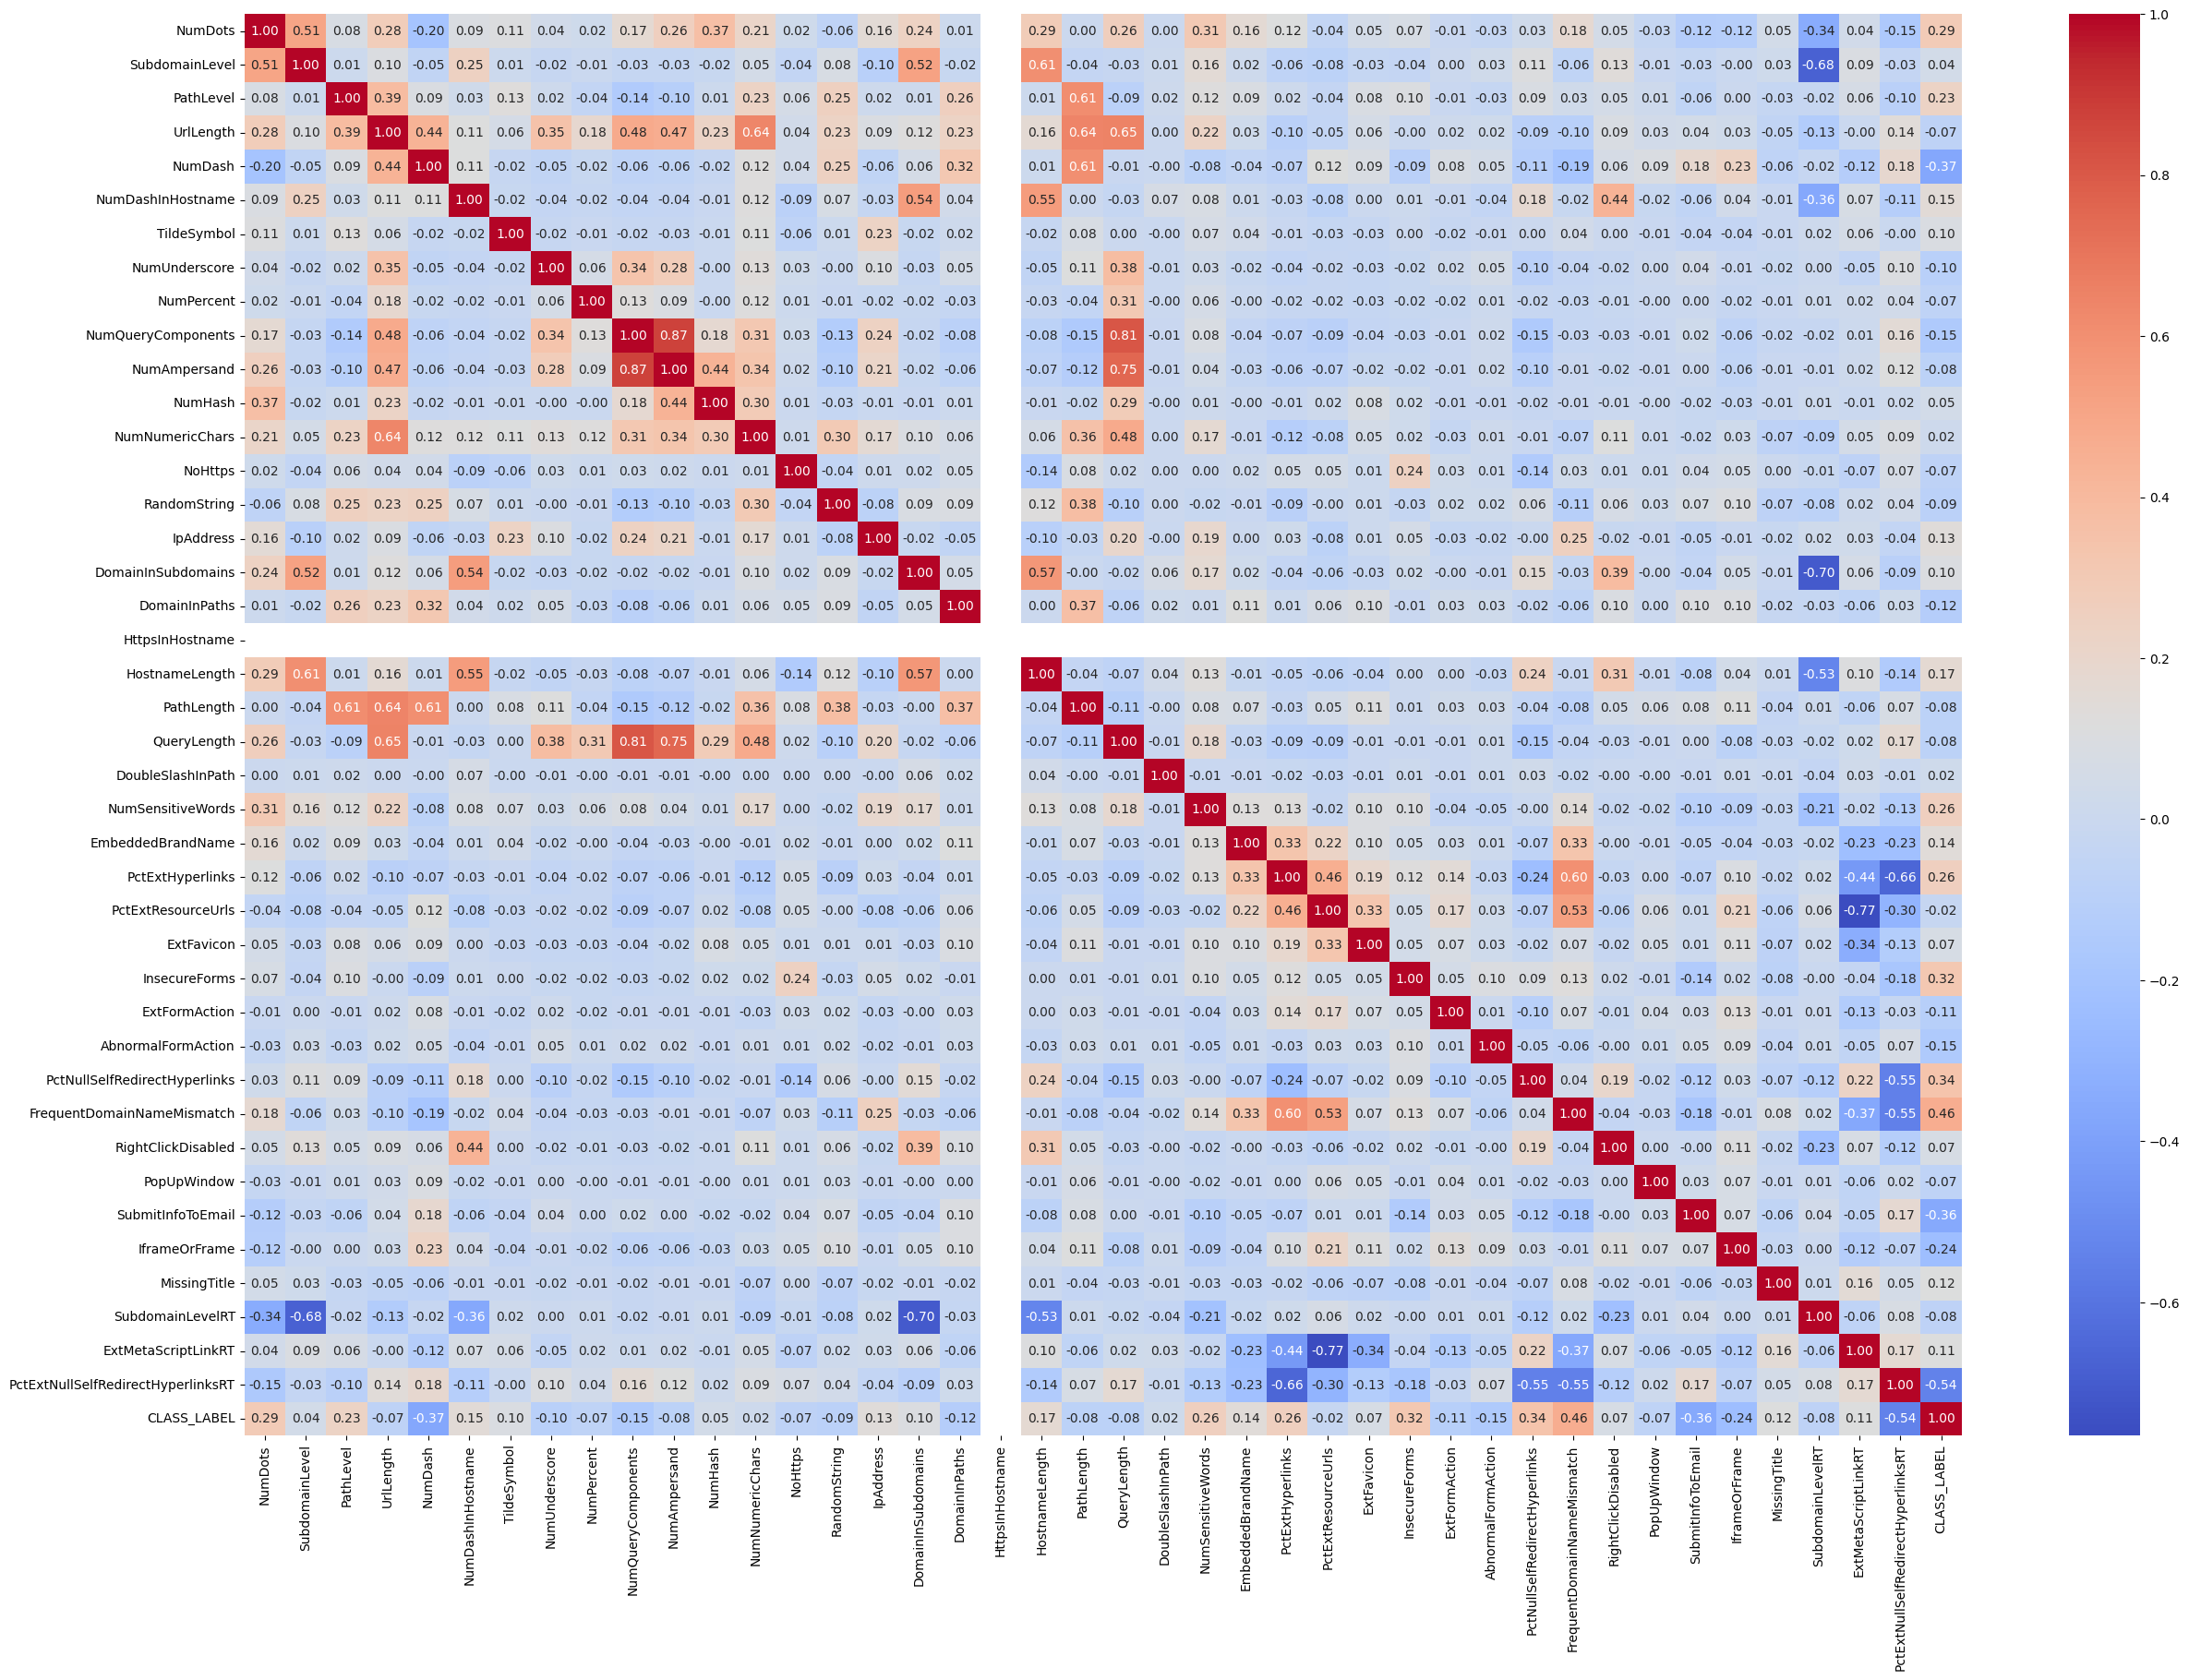

In [37]:
plt.figure(figsize=(30, 20))  # Increase the figure size for better visibility
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.show()
